In [ ]:
import pandas as pd
df = pd.read_csv('female_players.csv')

<ipython-input-3-a78a25d9acf2>:2: DtypeWarning: Columns (17,20,21,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('female_players.csv')


# 1. Helyzetfelmérés

In [ ]:
#
df.head()

,player_id,player_url,fifa_version,fifa_update,fifa_update_date,short_name,long_name,player_positions,overall,potential,value_eur,wage_eur,age,dob,height_cm,weight_kg,league_id,league_name,league_level,club_team_id,club_name,club_position,club_jersey_number,club_loaned_from,club_joined_date,club_contract_valid_until_year,nationality_id,nationality_name,nation_team_id,nation_position,nation_jersey_number,preferred_foot,weak_foot,skill_moves,international_reputation,work_rate,body_type,real_face,release_clause_eur,player_tags,player_traits,pace,shooting,passing,dribbling,defending,physic,attacking_crossing,attacking_finishing,attacking_heading_accuracy,attacking_short_passing,attacking_volleys,skill_dribbling,skill_curve,skill_fk_accuracy,skill_long_passing,skill_ball_control,movement_acceleration,movement_sprint_speed,movement_agility,movement_reactions,movement_balance,power_shot_power,power_jumping,power_stamina,power_strength,power_long_shots,mentality_aggression,mentality_interceptions,mentality_positioning,mentality_vision,mentality_penalties,mentality_composure,defending_marking_awareness,defending_standing_tackle,defending_sliding_tackle,goalkeeping_diving,goalkeeping_handling,goalkeeping_kicking,goalkeeping_positioning,goalkeeping_reflexes,goalkeeping_speed,ls,st,rs,lw,lf,cf,rf,rw,lam,cam,ram,lm,lcm,cm,rcm,rm,lwb,ldm,cdm,rdm,rwb,lb,lcb,cb,rcb,rb,gk,player_face_url
0,227125,/player/227125/sam-kerr/230009,23,9,2023-01-13,S. Kerr,Samantha May Kerr,ST,91,91,134500000.0,4000.0,28,1993-09-10,168,66,2216.0,Women's Super League,1.0,116010.0,Chelsea W,ST,20.0,NaN,2020-01-01,2024.0,195,Australia,NaN,NaN,NaN,Right,4,4,5,High/High,Normal (170-),Yes,275700000.0,"#Aerial Threat, #Dribbler, #Engine, #Distance ...","Solid Player, Leadership, Finesse Shot, Speed ...",87.0,91.0,74.0,90.0,42.0,83.0,70,93,91,78,92,90,76,68,64,92,89,85,90,91,82,91,91,87,86,89,70,24,95,79,75,92.0,44,39,30,7,12,8,16,13,NaN,91,91,91,87,89,89,89,87,86+3,86+3,86+3,85+3,78+3,78+3,78+3,85+3,64+3,62+3,62+3,62+3,64+3,61+3,58+3,58+3,58+3,61+3,20+3,https://cdn.sofifa.net/players/227/125/23_120.png
1,227316,/player/227316/wendie-renard/230009,23,9,2023-01-13,W. Renard,Wéndèleine Thérèse Renard,CB,91,91,89500000.0,3000.0,31,1990-07-20,187,70,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,LCB,3.0,NaN,2006-07-01,2026.0,18,France,113003.0,LCB,3.0,Right,3,2,5,High/Medium,Lean (185+),Yes,183500000.0,"#Aerial Threat, #Tackling, #Tactician, #Streng...","Leadership, Long Passer (AI), Power Header, Te...",63.0,72.0,71.0,72.0,93.0,87.0,51,70,96,84,55,69,65,58,87,85,65,62,53,90,34,85,86,75,93,65,88,90,70,59,75,84.0,93,94,91,7,14,17,11,15,NaN,78+3,78+3,78+3,71,75,75,75,71,74+3,74+3,74+3,72+3,79+3,79+3,79+3,72+3,80+3,87+3,87+3,87+3,80+3,82+3,91,91,91,82+3,21+3,https://cdn.sofifa.net/players/227/316/23_120.png
2,226301,/player/226301/alex-morgan/230009,23,9,2023-01-13,A. Morgan,Alexandra Morgan Carrasco,ST,90,90,NaN,NaN,32,1989-07-02,168,62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,95,United States,113009.0,ST,13.0,Left,4,4,5,High/Low,Unique,Yes,NaN,#Clinical Finisher,"Leadership, Finesse Shot, Flair, Speed Dribble...",89.0,91.0,80.0,88.0,47.0,77.0,71,95,86,91,87,87,68,70,82,93,88,89,83,84,67,90,81,87,81,83,53,46,92,75,88,92.0,41,43,39,11,11,10,10,11,NaN,90,90,90,87,89,89,89,87,87+3,87+3,87+3,86+3,82+3,82+3,82+3,86+3,69+3,67+3,67+3,67+3,69+3,66+3,60+3,60+3,60+3,66+3,19+3,https://cdn.sofifa.net/players/226/301/23_120.png
3,227310,/player/227310/ada-hegerberg/230009,23,9,2023-01-13,A. Hegerberg,Ada Martine Stolsmo Hegerberg,ST,90,91,143000000.0,3000.0,26,1995-07-10,176,68,2218.0,Feminine Division 1,1.0,116033.0,Lyon W,RES,14.0,NaN,2014-07-01,2024.0,36,Norway,113007.0,ST,14.0,Right,4,4,5,High/Medium,Normal (170-185),Yes,303900000.0,"#Aerial Threat, #Distance Shooter, #Clinical F...","Leadership, Outside Foot Shot, Technical Dribb...",83.0,91.0,77.0,87.0,39.0,77.0,71,94,93,84,90,91,79,75,72,91,81,85,74,92,47,86,89,75,81,89,65,23,96,76,86,86.0,42,33,30,15,7,12,10,14,NaN,90+1,90+1,90+1,87,89

In [ ]:
#
print(df.shape)
print(df.dtypes.value_counts())

(181361, 110)
object     47
int64      45
float64    18
dtype: int64


In [ ]:
#
df['league_name'].unique()

array(["Women's Super League", 'Feminine Division 1', nan,
       'World Cup Women'], dtype=object)

In [ ]:
#
df['fifa_version'].unique()

array([23, 22, 21, 20, 19, 18, 17, 16])

In [ ]:
#
df.groupby('league_name')['wage_eur'].apply(lambda x: x.isnull().sum())

league_name
Feminine Division 1      0
Women's Super League     0
World Cup Women         91
Name: wage_eur, dtype: int64

In [ ]:
#
df.groupby('league_name').apply(lambda x: x.isnull().sum().sum()/x.size*100)

league_name
Feminine Division 1      6.044664
Women's Super League     5.795267
World Cup Women         11.658342
dtype: float64

In [ ]:
#
df.groupby('league_name')['wage_eur'].mean()

league_name
Feminine Division 1     812.473483
Women's Super League    823.208402
World Cup Women                NaN
Name: wage_eur, dtype: float64

In [ ]:
df_23=df[df['fifa_version']==23]
df_23=df_23[df_23['fifa_update']==9]
df_23=df_23[df_23['league_id']==2216].reset_index()
#df_23.describe()

In [ ]:
#
pd.options.display.max_columns = None

In [ ]:
#
pd.options.display.max_rows = None
print(df_23.shape)
print(len(df_23.columns[df_23.isna().any()]))
print(df_23.isna().sum().sum())
print(df_23.isna().sum().sum()/df_23.size*100)
print(df_23.columns.to_list())

In [ ]:
#
df_23['wage_eur'].describe()

count     276.000000
mean      810.326087
std       424.898151
min       500.000000
25%       500.000000
50%       750.000000
75%      1000.000000
max      4000.000000
Name: wage_eur, dtype: float64

In [ ]:
df_skills=df_23[['player_id','overall', 'potential','value_eur', 'wage_eur',
                  'pace', 'shooting', 'passing', 'dribbling', 'defending', 'physic', 'attacking_crossing',
                  'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                  'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
                  'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
                  'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
                  'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes']]
#df_skills.head()

In [ ]:
#
df_skills.shape

(276, 45)

In [ ]:
df_info=df_23[['player_id','player_positions', 'value_eur', 'wage_eur',
                  'age', 'height_cm', 'weight_kg', 'club_team_id', 'club_contract_valid_until_year',
                  'nationality_id',
                  'international_reputation', 'work_rate', 'body_type']]
#df_info.head()

In [ ]:
#
print(df_info.shape)
print(df_info.dtypes.value_counts())

(276, 13)
int64      6
float64    4
object     3
dtype: int64


# 2. Adattisztítás


In [ ]:
def average_attributes(col_name, start, end):
  df_skills[col_name]=df_23.loc[:,start:end].mean(axis=1).round(1)

In [ ]:
average_attributes('attacking_attributes', 'attacking_crossing','attacking_volleys')
average_attributes('skills_attributes', 'skill_dribbling','skill_ball_control')
average_attributes('movements_attributes','movement_acceleration','movement_balance')
average_attributes('power_attributes','power_shot_power','power_long_shots')
average_attributes('mentality_attributes','mentality_aggression','mentality_composure')
average_attributes('defending_attributes','defending_marking_awareness','defending_sliding_tackle')
average_attributes('goalkeeping_attributes','goalkeeping_diving','goalkeeping_reflexes')

<ipython-input-20-232ebd372fc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skills[col_name]=df_23.loc[:,start:end].mean(axis=1).round(1)
<ipython-input-20-232ebd372fc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skills[col_name]=df_23.loc[:,start:end].mean(axis=1).round(1)
<ipython-input-20-232ebd372fc5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [ ]:

df_skills.drop(['attacking_crossing',
                  'attacking_finishing', 'attacking_heading_accuracy', 'attacking_short_passing', 'attacking_volleys',
                  'skill_dribbling', 'skill_curve', 'skill_fk_accuracy', 'skill_long_passing', 'skill_ball_control',
                  'movement_acceleration', 'movement_sprint_speed', 'movement_agility', 'movement_reactions', 'movement_balance',
                  'power_shot_power', 'power_jumping', 'power_stamina', 'power_strength', 'power_long_shots', 'mentality_aggression',
                  'mentality_interceptions', 'mentality_positioning', 'mentality_vision', 'mentality_penalties', 'mentality_composure',
                  'defending_marking_awareness', 'defending_standing_tackle', 'defending_sliding_tackle', 'goalkeeping_diving',
                  'goalkeeping_handling', 'goalkeeping_kicking', 'goalkeeping_positioning', 'goalkeeping_reflexes'], axis=1, inplace=True)

<ipython-input-22-dd503ca61e60>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_skills.drop(['attacking_crossing',


In [ ]:
df_skills.shape

(276, 18)

In [ ]:
df_skills.columns

Index(['player_id', 'overall', 'potential', 'value_eur', 'wage_eur', 'pace',
       'shooting', 'passing', 'dribbling', 'defending', 'physic',
       'attacking_attributes', 'skills_attributes', 'movements_attributes',
       'power_attributes', 'mentality_attributes', 'defending_attributes',
       'goalkeeping_attributes'],
      dtype='object')

In [ ]:
df_info['player_positions']=df_info['player_positions'].str.split(',').str[0]

<ipython-input-25-1cca97d2d252>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['player_positions']=df_info['player_positions'].str.split(',').str[0]


In [ ]:
df_info['player_positions']=df_info['player_positions'].str.replace('LWB', 'LB')
df_info['player_positions']=df_info['player_positions'].str.replace('CF', 'CAM')
df_info['player_positions']=df_info['player_positions'].str.replace('LM', 'LW')
df_info['player_positions']=df_info['player_positions'].str.replace('RM', 'RW')

<ipython-input-26-efdd3c00e86d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['player_positions']=df_info['player_positions'].str.replace('LWB', 'LB')
<ipython-input-26-efdd3c00e86d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['player_positions']=df_info['player_positions'].str.replace('CF', 'CAM')
<ipython-input-26-efdd3c00e86d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

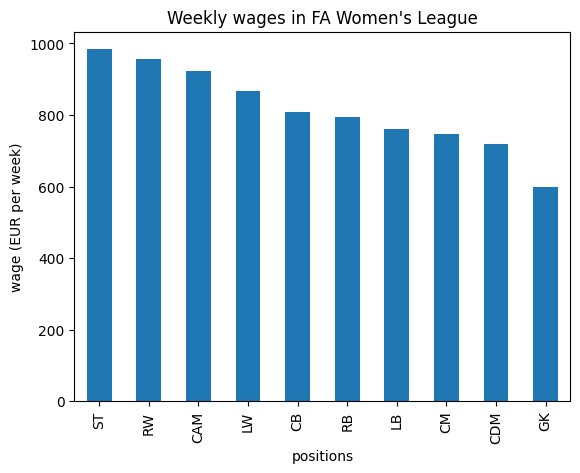

In [ ]:

import matplotlib.pyplot as plt

avg_wage=df_info.groupby('player_positions')['wage_eur'].mean().sort_values(ascending=False)
fig, ax=plt.subplots()
avg_wage.plot(kind='bar', ax=ax)
plt.xlabel("positions")
plt.ylabel("wage (EUR per week)")
plt.title("Weekly wages in FA Women's League")
plt.show()

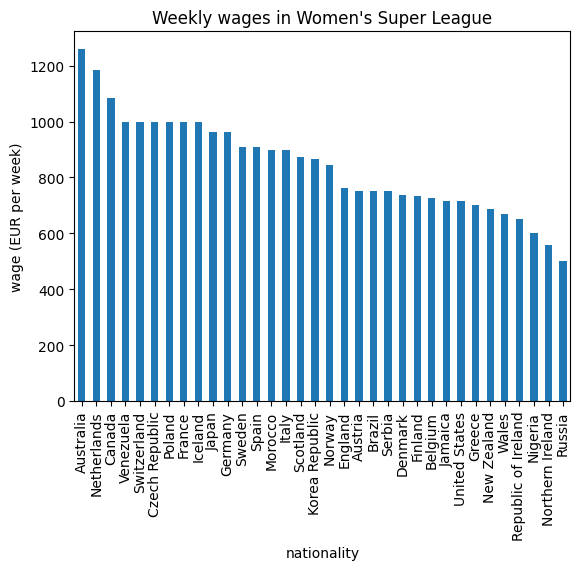

In [ ]:
avg_wage=df_23.groupby('nationality_name')['wage_eur'].mean().sort_values(ascending=False)
fig, ax=plt.subplots()
avg_wage.plot(kind='bar', ax=ax)
plt.xlabel("nationality")
plt.ylabel("wage (EUR per week)")
plt.title("Weekly wages in Women's Super League")
plt.show()

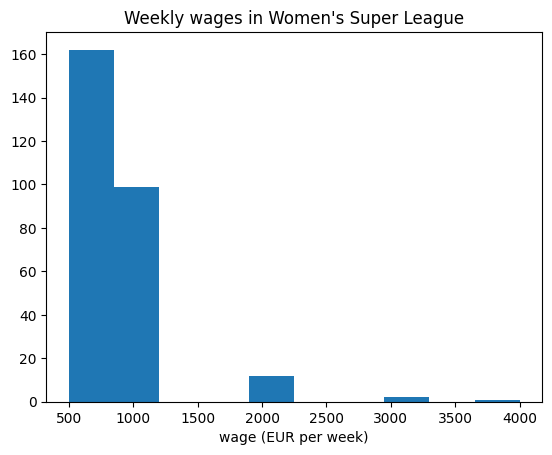

In [ ]:
plt.hist(df_23['wage_eur'])
plt.xlabel("wage (EUR per week)")
plt.title("Weekly wages in Women's Super League")
plt.show()

In [ ]:
#
df_23.groupby('nationality_name').size().sort_values(ascending=False)

nationality_name
England                122
Wales                   16
Scotland                12
Republic of Ireland     12
Norway                  11
Sweden                  10
Australia               10
Denmark                  9
Netherlands              6
Canada                   6
United States            6
France                   5
Spain                    5
Northern Ireland         5
Germany                  4
Japan                    4
New Zealand              4
Finland                  3
Korea Republic           3
Jamaica                  3
Switzerland              3
Austria                  2
Brazil                   2
Belgium                  2
Serbia                   2
Venezuela                1
Nigeria                  1
Russia                   1
Poland                   1
Czech Republic           1
Italy                    1
Iceland                  1
Greece                   1
Morocco                  1
dtype: int64

In [ ]:
df_info.dtypes

player_id                           int64
player_positions                   object
value_eur                         float64
wage_eur                          float64
age                                 int64
height_cm                           int64
weight_kg                           int64
club_team_id                      float64
club_contract_valid_until_year    float64
nationality_id                      int64
international_reputation            int64
work_rate                          object
body_type                          object
dtype: object

In [ ]:
df_info['work_rate'].unique()

array(['High/High', 'High/Medium', 'Low/High', 'Medium/Medium',
       'Medium/High', 'High/Low', 'Low/Medium', 'Medium/Low'],
      dtype=object)

In [ ]:
pos_map={'ST':55, 'RW':54, 'CM':35, 'LW':56, 'CB':15, 'CAM':45,
         'GK':0, 'RB':14, 'LB':16, 'CDM':25}
workrate_map={'High/High':6, 'High/Medium': 4, 'Low/High':3, 'Medium/Medium':2,
       'Medium/High':4, 'High/Low':3, 'Low/Medium':1, 'Medium/Low':1}

def encode_pos(position):
  encoded=pos_map.get(position)
  return encoded

def encode_workrate(col):
    encoded = workrate_map.get(col)
    return encoded

df_info['player_positions']=df_info['player_positions'].apply(encode_pos)
df_info['work_rate'] = df_info['work_rate'].apply(encode_workrate)

<ipython-input-33-4281f112f89a>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['player_positions']=df_info['player_positions'].apply(encode_pos)
<ipython-input-33-4281f112f89a>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['work_rate'] = df_info['work_rate'].apply(encode_workrate)


In [ ]:
from sklearn import preprocessing
e = preprocessing.OrdinalEncoder()
cat=df_info[['body_type']]
enc=e.fit_transform(cat)
enc=pd.DataFrame(enc, columns=cat.columns)

In [ ]:
#
enc.head()

,body_type
0,3.0
1,3.0
2,4.0
3,3.0
4,3.0


In [ ]:
df_info['body_type']=enc['body_type']
df_info.head()

<ipython-input-36-030f366b2f06>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_info['body_type']=enc['body_type']


,player_id,player_positions,value_eur,wage_eur,age,height_cm,weight_kg,club_team_id,club_contract_valid_until_year,nationality_id,international_reputation,work_rate,body_type
0,227125,55,134500000.0,4000.0,28,168,66,116010.0,2024.0,195,5,6,3.0
1,245802,54,110000000.0,3000.0,27,163,58,116009.0,2025.0,14,4,6,3.0
2,233746,55,111000000.0,3000.0,25,178,65,116009.0,2023.0,34,5,6,4.0
3,245872,35,72000000.0,2000.0,32,162,57,116009.0,2023.0,42,4,6,3.0
4,227323,56,85000000.0,2000.0,27,167,60,116010.0,2025.0,36,3,4,3.0


# 3. Korreláció

In [ ]:

corr_info=df_info.corr()['wage_eur'].sort_values(ascending=False)
corr_info


wage_eur                          1.000000
value_eur                         0.819639
international_reputation          0.774912
work_rate                         0.533649
age                               0.327306
player_positions                  0.214831
nationality_id                    0.159660
club_contract_valid_until_year    0.147131
body_type                         0.049018
weight_kg                         0.001415
height_cm                        -0.063621
club_team_id                     -0.149964
player_id                        -0.485822
Name: wage_eur, dtype: float64

In [ ]:
corr_skills=df_skills.corr()['wage_eur'].abs().sort_values(ascending=False)
corr_skills

wage_eur                  1.000000
value_eur                 0.819639
overall                   0.707248
power_attributes          0.574545
dribbling                 0.521301
player_id                 0.485822
passing                   0.470697
movements_attributes      0.453810
attacking_attributes      0.421609
mentality_attributes      0.417014
shooting                  0.399652
potential                 0.392572
skills_attributes         0.392519
physic                    0.387154
pace                      0.369403
goalkeeping_attributes    0.131406
defending_attributes      0.113133
defending                 0.036268
Name: wage_eur, dtype: float64

# 4. Döntési Fa

In [ ]:
df_dt=pd.merge(df_skills, df_info)

In [ ]:
df_dt=df_dt.dropna().reset_index()

In [ ]:
df_dt=df_dt[['player_id','wage_eur','value_eur', 'overall', 'power_attributes', 'dribbling',
                     'passing', 'movements_attributes', 'attacking_attributes',
                     'mentality_attributes', 'international_reputation',
                     'work_rate']]

In [ ]:
!pip install scikit-surprise

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
classlabel=df_dt['wage_eur']
features=df_dt[['value_eur', 'overall', 'power_attributes', 'dribbling',
                     'passing', 'movements_attributes', 'attacking_attributes',
                     'mentality_attributes', 'international_reputation',
                     'work_rate']]
X_train, X_test, y_train, y_test=train_test_split(features,classlabel,test_size=0.5)
dt=DecisionTreeClassifier()
dt.fit(features, classlabel)
prediction=dt.predict(X_test)
print(accuracy_score(y_test, prediction))

1.0


<bound method BaseDecisionTree.get_depth of DecisionTreeClassifier()>

In [ ]:
print(len(prediction))
for i in range(len(prediction)):
  if y_test.iloc[i]!=prediction[i]:
    print(f'Eredeti: {y_test.iloc[i]}, Előrejelzett: {prediction[i]}')


124


In [ ]:
new_player=pd.DataFrame([[10000, 60, 58, 61, 64, 70, 62,77, 0, 6]], columns=['value_eur', 'overall', 'power_attributes', 'dribbling',
                     'passing', 'movements_attributes', 'attacking_attributes',
                     'mentality_attributes', 'international_reputation',
                     'work_rate'])
wage=dt.predict(new_player)
wage

array([500.])

In [ ]:
!pip install eli5

In [ ]:
import eli5
dt_vis=eli5.show_weights(dt, feature_names=list(features.columns), show=["decision_tree"], filled="True")
dt_vis